# Create ML Datasets from Snapshots
In this notebook, we extract the dataset for ML (`csv`) from the snapshot created with `SnapshotCreator`. In particular, we perform the following steps:
1. We load all 7 Ar39 Pileups and compute the cut w.r.t. the maximum simulated value.
1. We select the low-energy muons and combine them wt 1,2,3 Ar39 Pileups.
1. We create datasets of Ar39 Pileups.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, glob

In [10]:
dirin = "../Development/Out/T10us/Ar39_1to7Pileups"
filein = "Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part*.csv"

df7ar39 = pd.DataFrame()
for i, file in enumerate(glob.glob(os.path.join(dirin, filein))):
    print(file)
    if i==0:
        df7ar39 = pd.read_csv(file, comment='#', index_col=False)
        df7ar39 = df7ar39[df7ar39.columns[:-1]]    # remove last unnamed col
    else:
        tmp = pd.read_csv(file, comment='#', index_col=False)
        tmp = tmp[tmp.columns[:-1]]    # remove last unnamed col
        df7ar39 = pd.concat([df7ar39, tmp])
print("[Info] 7 Ar39 Pileups: {}".format(len(df7ar39)))
df7ar39 = df7ar39[df7ar39.pedetected > 0]
print("[Info] 7 Ar39 Pileups: {} non-zero detections".format(len(df7ar39)))

../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part10.csv
../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part1.csv
../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part2.csv
../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part3.csv
../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part4.csv
../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part5.csv
../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part6.csv
../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part7.csv
../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Gr

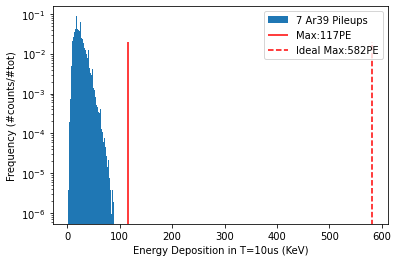

count    901292.000000
mean         23.007388
std           9.220154
min           2.000000
25%          16.000000
50%          21.000000
75%          28.000000
max         117.000000
Name: pedetected, dtype: float64

In [14]:
# Plot PE detection of 7 Ar39s pileups
ar39_maxE = 565
op_yield = 40
max_op_detection_eff = 0.0092
quantum_eff = 0.4
ideal_max_pe = int(7 * ar39_maxE * op_yield * max_op_detection_eff * quantum_eff)
plt.hist(df7ar39.pedetected, bins=100, label="7 Ar39 Pileups", density=True)
plt.vlines(df7ar39.pedetected.max(), ymin=0, ymax=.02, color='r', label="Max:{}PE".format(df7ar39.pedetected.max()))
plt.vlines(ideal_max_pe, ymin=0, ymax=.02, color='r', linestyles='dashed', label="Ideal Max:{}PE".format(ideal_max_pe))
plt.legend()
plt.xlabel("Energy Deposition in T=10us (KeV)")
plt.ylabel("Frequency (#counts/#tot)")
plt.yscale("log")
plt.show()

df7ar39.pedetected.describe()

In [2]:
# load muon wt 0 < pedetected < max (117PE)
dirin = "../Development/Out/T10us/Muons/"
filein = "Muons_wtQEff_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part1.csv"

dfmuons = pd.read_csv(os.path.join(dirin, filein), comment='#', index_col=False)
dfmuons = dfmuons[dfmuons.columns[:-1]]   # remove last Unnamed column

print("[Info] Muons : {}".format(len(dfmuons)))
dfmuons = dfmuons[dfmuons.pedetected>0]   # remove event=1 (always blank when grp=1)
print("[Info] Muons wt Non-zero Detectinons: {}".format(len(dfmuons)))
dfmarginals = dfmuons[(dfmuons.pedetected>0)]
print("[Info] Low-Energy Muons : {}".format(len(dfmarginals)))

[Info] Muons : 14837
[Info] Muons wt Non-zero Detectinons: 14836
[Info] Low-Energy Muons : 14836


In [5]:
dfmarginals.pedetected.describe()

count     14836.000000
mean       3214.474993
std       14852.419500
min           1.000000
25%          21.000000
50%         745.500000
75%        3282.500000
max      865951.000000
Name: pedetected, dtype: float64

[Info] Loaded Muons
[Result] Produced 14836 events, wt avg 3214.47 PE


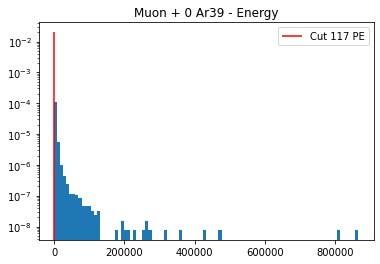

In [6]:
# creation of combined dataset muons + ar39s
import numpy as np

dirout = "data/Muons/"    # where to write combined datasets
dirin = "../Development/Out/T10us/Ar39_1to7Pileups"
fileinformat = "Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp{}_Seed123456789_Part*.csv"

bins = np.linspace(0, 300, 100)
for i in range(1):
    # load marginal muons
    dfmarginals_kar39 = dfmarginals.reset_index()
    print("[Info] Loaded Muons")
    if i > 0:
        # load ar39
        filein = fileinformat.format(i)    # load 1, 2, 3 ar39
        dfKar39 = pd.read_csv(os.path.join(dirin, filein), comment='#', index_col=False)
        dfKar39 = dfKar39[dfKar39.columns[:-1]]    # remove last unnamed col
        dfKar39 = dfKar39[dfKar39.pedetected > 0]  # remove zero-detection events
        dfKar39 = dfKar39.head(len(dfmarginals_kar39))    # get first N ar39 events (avoid NaN in `add`)
        print("[Info] Loaded first {} events of {} Ar39s".format(len(dfKar39), i))
        print("[Info]    Their Avg pe detection: {:.2f} PE".format(dfKar39.pedetected.mean()))
        # combine muons + ar 39
        dfmarginals_kar39 = dfmarginals_kar39.add(dfKar39.reset_index())
    # columns selection (remove meaningless cols, like eventnumber (it is now the sum of creator events))
    dfmarginals_kar39 = dfmarginals_kar39[dfmarginals_kar39.columns[2:]]
    # cut again on energy 
    #dfmarginals_kar39 = dfmarginals_kar39[(dfmarginals_kar39.pedetected > 0) & (dfmarginals_kar39.pedetected <= 117)]    
    print("[Result] Produced {} events, wt avg {:.2f} PE".format(len(dfmarginals_kar39), dfmarginals_kar39.pedetected.mean()))
    # plot
    plt.title("Muon + {} Ar39 - Energy ()".format(i))
    plt.hist(dfmarginals_kar39.pedetected, bins=bins, density=True)
    plt.vlines(117, ymin=0, ymax=.02, color='r', label="Cut 117 PE")
    plt.yscale('log')
    plt.legend()
    plt.show()
    # write output
    dfmarginals_kar39.to_csv(os.path.join(dirout, "LowEnergyMuons_wt_{}ar39_ALL.csv".format(i)), index=False)
    

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    return df

[Info] Loading ../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part1.csv
[Info] Loading ../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part10.csv
[Info] Loading ../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part11.csv
[Info] Loading ../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part12.csv
[Info] Loading ../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part13.csv
[Info] Loading ../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part14.csv
[Info] Loading ../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part15.csv
[Info] Loading ../Development/Out/T10us/Ar39_1to7Pileups/Ar39_06142020_10M_Snapshots_T10000

[Info] Loaded first 6309048 events of 1 Ar39s
[Info]    Their Avg pe detection: 3.51 PE
[Result] Produced 6309048 events, wt avg 3.51 PE


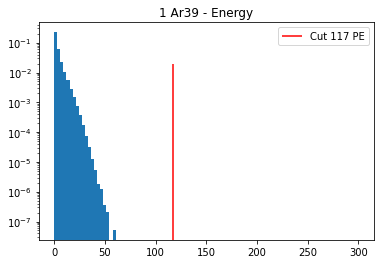

In [3]:
# creation of ar39 dataset
import numpy as np

dirout = "data/Ar39/"    # where to write combined datasets
dirin = "../Development/Out/T10us/Ar39_1to7Pileups"
fileinformat = "Ar39_06142020_10M_Snapshots_T10000_DT10000_Grp{}_Seed123456789_Part*.csv"

bins = np.linspace(0, 300, 100)
num_events_per_dataset = 10000000
for i in range(1, 2):
    # load ar39
    fileinprefix = fileinformat.format(i)
    dfKar39 = load_dataframe_from_files(dirin, fileinprefix)
    dfKar39 = dfKar39[dfKar39.columns[:-1]]    # remove last unnamed col
    dfKar39 = dfKar39[dfKar39.pedetected > 0]  # remove zero-detection events
    dfKar39 = dfKar39.tail(num_events_per_dataset)    # get first N ar39 events (avoid NaN in `add`)
    print("[Info] Loaded first {} events of {} Ar39s".format(len(dfKar39), i))
    print("[Info]    Their Avg pe detection: {:.2f} PE".format(dfKar39.pedetected.mean()))
    # columns selection (remove meaningless cols, like eventnumber (it is now the sum of creator events))
    dfKar39 = dfKar39[dfKar39.columns[2:]]
    # cut again on energy 
    assert(len(dfKar39[(dfKar39.pedetected <= 117)]))
    print("[Result] Produced {} events, wt avg {:.2f} PE".format(len(dfKar39), dfKar39.pedetected.mean()))
    # plot
    plt.title("{} Ar39 - Energy".format(i))
    plt.hist(dfKar39.pedetected, bins=bins, density=True)
    plt.vlines(117, ymin=0, ymax=.02, color='r', label="Cut 117 PE")
    plt.yscale('log')
    plt.legend()
    plt.show()
    # write output
    dfKar39.to_csv(os.path.join(dirout, "Ar39_{}Pileup_cut117PE_n{}.csv".format(i, len(dfKar39))), index=False)
    

In [4]:
dfKar39.pedetected.describe()

count    6.309048e+06
mean     3.514684e+00
std      3.559003e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      6.000000e+01
Name: pedetected, dtype: float64